In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [66]:
# load the data
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df = pd.read_csv(url)
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
718,2014,MAZDA,MX-5,TWO-SEATER,2.0,4,AS6,Z,11.5,8.5,10.2,28,235
634,2014,LAMBORGHINI,GALLARDO COUPE,TWO-SEATER,5.2,10,A6,Z,18.0,12.8,15.7,18,361
27,2014,AUDI,A6 QUATTRO TDI CLEAN DIESEL,MID-SIZE,3.0,6,AS8,D,9.8,6.4,8.3,34,224
275,2014,CHRYSLER,200 CONVERTIBLE,COMPACT,2.4,4,A4,X,11.7,8.2,10.1,28,232
55,2014,AUDI,S4,COMPACT,3.0,6,A7,Z,13.2,9.2,11.4,25,262


In [67]:
# describe the statistical properties of the dataset
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [68]:
# show more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [69]:
# drop redundant categorical variables (same from previous example)
df.drop(columns= ["MODELYEAR", "MAKE", "MODEL", "VEHICLECLASS", "TRANSMISSION", "FUELTYPE"], inplace = True)
df.sample(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1005,5.7,8,17.6,12.9,15.5,18,356
14,4.7,8,17.4,11.3,14.7,19,338
992,2.5,4,10.6,8.2,9.5,30,218
698,2.5,4,9.8,7.9,8.9,32,205
381,5.0,8,16.4,12.3,14.6,19,336


In [70]:
# print the correlation table
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


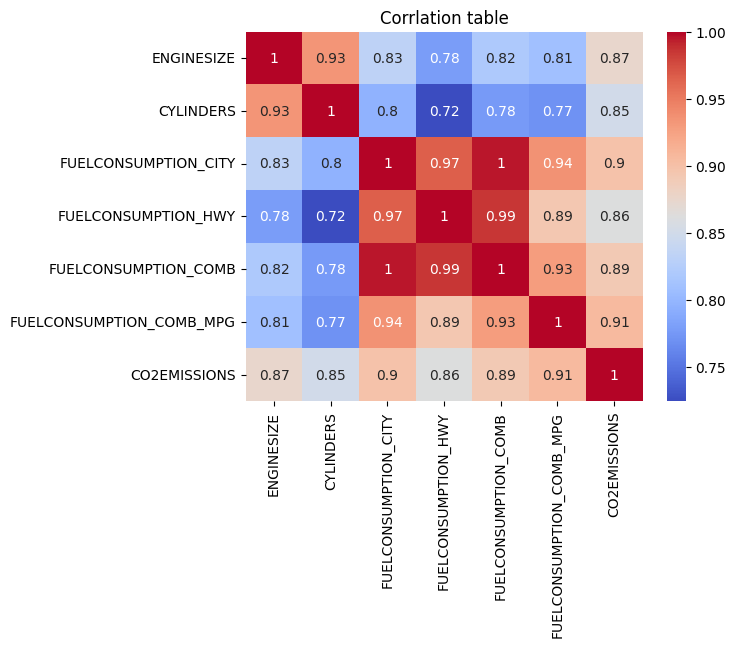

In [71]:
# heatmap plot
sb.heatmap(np.abs(df.corr()), cmap = "coolwarm", annot = True)
plt.title("Corrlation table")
plt.show()

In [80]:
X = df[["FUELCONSUMPTION_COMB", "ENGINESIZE"]]
y = df["CO2EMISSIONS"]

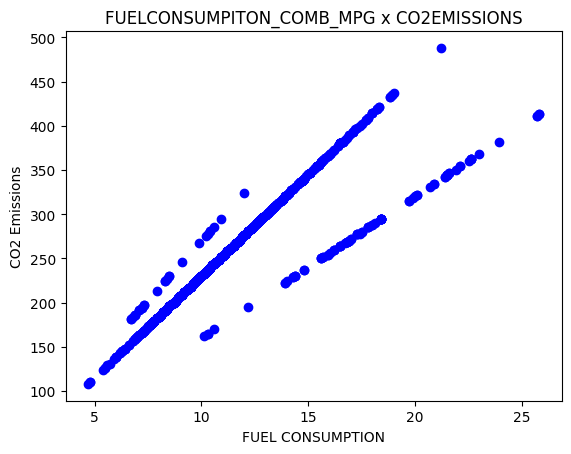

In [89]:
plt.scatter(X.iloc[:, 0], y, color = "blue")
plt.title("FUELCONSUMPITON_COMB_MPG x CO2EMISSIONS")
plt.xlabel("FUEL CONSUMPTION")
plt.ylabel("CO2 Emissions")
plt.show()

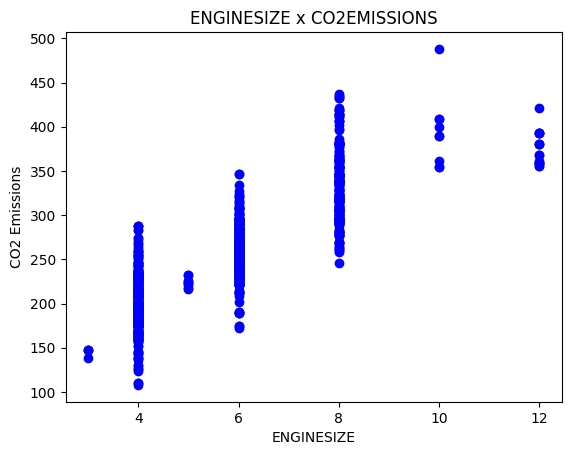

In [ ]:
plt.scatter(X.iloc[:, 1], y, color = "blue")
plt.title("ENGINESIZE x CO2EMISSIONS")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2 Emissions")
plt.show()

In [81]:
# standardize the data 
from sklearn.preprocessing import StandardScaler
se = StandardScaler()

X_scaled = se.fit_transform(X)

In [82]:
# split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)



In [83]:
# train the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

print(model.predict(X_test))

[298.65481489 240.51704059 273.2553292  230.72062697 205.35673614
 241.30091025 305.95802296 287.82536763 307.41819487 308.84355476
 288.64483215 375.35238279 250.02869536 251.09732386 262.67504593
 254.9446996  208.09988852 251.13291872 187.9011659  308.48682337
 317.03663421 205.28554643 253.8760711  250.20666964 257.65225713
 196.62895102 206.31858007 184.05379017 311.44354488 246.18131963
 393.16468442 208.38464736 205.28554643 325.69322961 233.60615877
 282.30346802 266.66480108 400.82384104 200.54751647 210.34393008
 174.43535082 185.0156341  183.02075652 215.15314975 283.9779919
 197.51960524 240.33906631 254.76672532 193.81460893 348.84867374
 323.23483607 279.02639281 213.05148761 269.44354832 260.53778893
 316.18157484 390.24355776 326.90423753 192.85276499 285.0466204
 291.67274337 277.35186892 283.15852738 254.98029445 190.7866977
 245.2906654  182.05891259 296.76672188 249.95750565 264.63432865
 345.89195223 197.66198466 258.79207534 209.20411187 214.97517548
 292.49220788

In [84]:
print(model.predict([[5, 10]]))

[701.39375435]


In [85]:
from sklearn.metrics import r2_score

print("R2 score = ", r2_score(y_test, model.predict(X_test)))

R2 score =  0.8685405139405122
